In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset shape:", df.shape)
print("\nFeature names:", list(data.feature_names))
print("\nTarget distribution:")
print(df['target'].value_counts())
print("\nFirst few rows:")
print(df.head())

Dataset shape: (150, 5)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
ab_acc = accuracy_score(y_test, ab_pred)

print("--- Ensemble Classification ---")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"AdaBoost Accuracy: {ab_acc:.4f}")

--- Ensemble Classification ---
Random Forest Accuracy: 1.0000
Gradient Boosting Accuracy: 1.0000
AdaBoost Accuracy: 0.9333



--- Random Forest Confusion Matrix ---
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


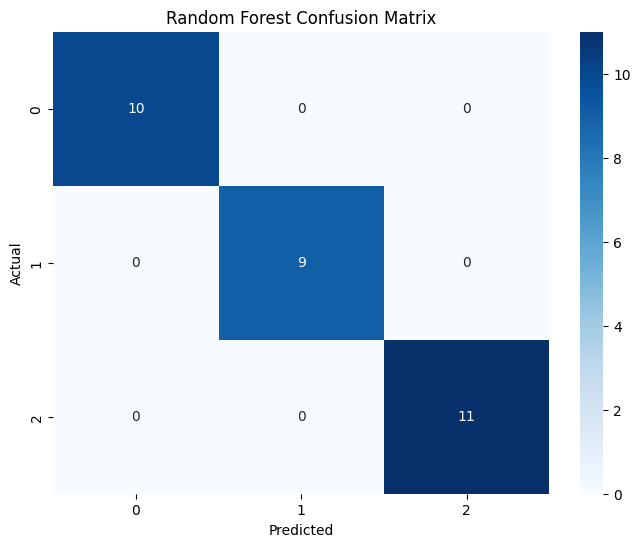

In [5]:
print("\n--- Random Forest Confusion Matrix ---")
cm = confusion_matrix(y_test, rf_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [6]:
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_pred, target_names=data.target_names))


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



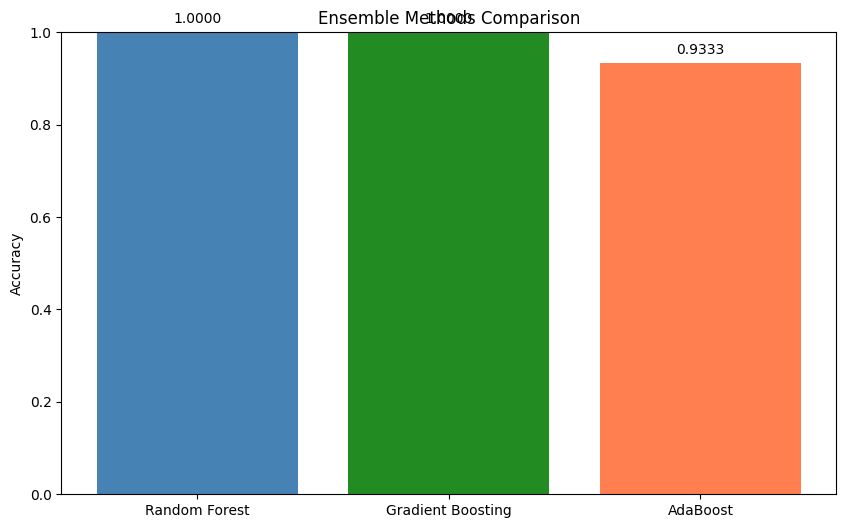

In [7]:
plt.figure(figsize=(10, 6))
models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
accuracies = [rf_acc, gb_acc, ab_acc]
plt.bar(models, accuracies, color=['steelblue', 'forestgreen', 'coral'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Ensemble Methods Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()